In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 数据处理

In [3]:
data = pd.read_csv('./dataset/tt/train.csv')

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [6]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [8]:
data.fillna(0, inplace=True)

In [9]:
data['Sex'] = [1 if x=='male' else 0 for x in data.Sex]

In [10]:
data['p1'] = np.array(data['Pclass']==1).astype(np.int32)
data['p2'] = np.array(data['Pclass']==2).astype(np.int32)
data['p3'] = np.array(data['Pclass']==3).astype(np.int32)

In [11]:
del data['Pclass']

In [12]:
data.Embarked.unique()

array(['S', 'C', 'Q', 0], dtype=object)

In [13]:
data['e1'] = np.array(data['Embarked']=='S').astype(np.int32)
data['e2'] = np.array(data['Embarked']=='C').astype(np.int32)
data['e3'] = np.array(data['Embarked']=='Q').astype(np.int32)

In [14]:
del data['Embarked']

In [15]:
data.values.dtype

dtype('float64')

一般没有必要做标准化，只有需要用数据距离进行划分时，才会用到标准化

In [16]:
data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,p1,p2,p3,e1,e2,e3
0,0,1,22.0,1,0,7.2500,0,0,1,1,0,0
1,1,0,38.0,1,0,71.2833,1,0,0,0,1,0
2,1,0,26.0,0,0,7.9250,0,0,1,1,0,0
3,1,0,35.0,1,0,53.1000,1,0,0,1,0,0
4,0,1,35.0,0,0,8.0500,0,0,1,1,0,0


In [19]:
data_train = data[[x for x in data.columns if x != 'Survived']].values

In [21]:
data_target = data['Survived'].values.reshape(len(data),1)

In [22]:
np.shape(data_train), np.shape(data_target)

((891, 11), (891, 1))

In [23]:
from sklearn.model_selection import train_test_split  
# model_selection：评价模型相关工具

In [24]:
x_train, x_test, y_train, y_test = train_test_split(data_train, data_target,
                                                    test_size=0.2)

In [25]:
x_train.shape, x_test.shape

((712, 11), (179, 11))

# 决策树

如果特征为连续值，需要根据需求对数据进行离散化处理

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model = DecisionTreeClassifier()

In [28]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [29]:
model.score(x_test, y_test)

0.8044692737430168

In [30]:
model.score(x_train, y_train)

0.9859550561797753

## 控制树的深度处理过拟合

In [44]:
def m_score(depth):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    return train_score, test_score

In [45]:
depths = range(2,15)
scores = [m_score(depth) for depth in depths]

In [46]:
scores

[(0.7907303370786517, 0.770949720670391),
 (0.8188202247191011, 0.8156424581005587),
 (0.8412921348314607, 0.7988826815642458),
 (0.8539325842696629, 0.8100558659217877),
 (0.8609550561797753, 0.7877094972067039),
 (0.8848314606741573, 0.8044692737430168),
 (0.9030898876404494, 0.7653631284916201),
 (0.9171348314606742, 0.7932960893854749),
 (0.9325842696629213, 0.7877094972067039),
 (0.9480337078651685, 0.776536312849162),
 (0.9662921348314607, 0.8100558659217877),
 (0.9719101123595506, 0.8100558659217877),
 (0.976123595505618, 0.8044692737430168)]

In [47]:
train_s = [s[0] for s in scores]
test_s = [s[1] for s in scores]

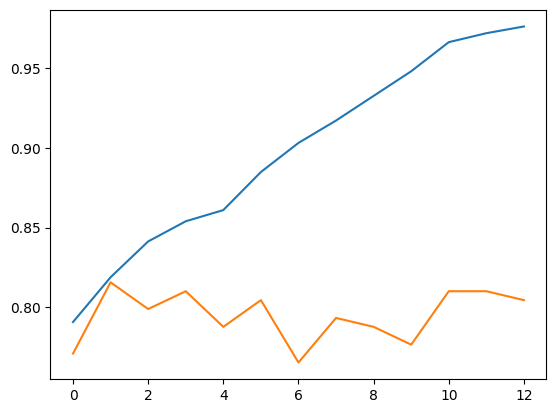

In [48]:
plt.plot(train_s)
plt.plot(test_s)

## 设置信息增益阈值处理过拟合

In [49]:
def m_score(depth):
    model = DecisionTreeClassifier(min_impurity_split=depth)
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    return train_score, test_score

In [50]:
values = np.linspace(0,0.5,50)
scores = [m_score(value) for value in values]

In [51]:
train_s = [s[0] for s in scores]
test_s = [s[1] for s in scores]

In [52]:
best_index = np.argmax(test_s)

In [53]:
best_score = test_s[best_index]
best_value = values[best_index]

In [54]:
best_score, best_value

(0.8156424581005587, 0.01020408163265306)

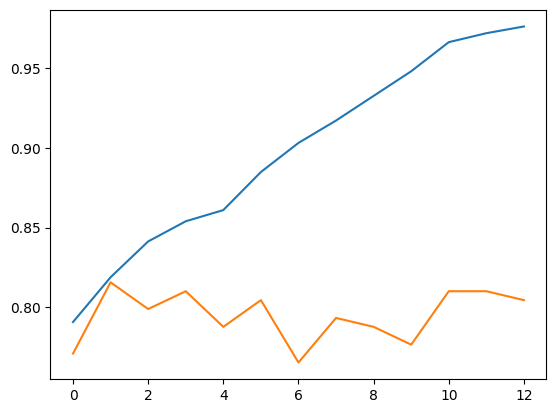

In [55]:
plt.plot(train_s)
plt.plot(test_s)

# 交叉验证

为什么需要交叉验证——解决随机划分的差异和参数选择的问题

让所有的数据都参加到训练和评价当中

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
values = np.linspace(0, 0.5, 50)
depths = range(2,15)

In [61]:
# param_grid = {'max_depth':depths, 'min_impurity_split': values}
param_grid = {'max_depth':depths, 'min_impurity_decrease': values}

In [62]:
model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)  # 5折交叉验证

In [63]:
model.fit(data_train, data_target)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 15),
                         'min_impurity_decrease': array([0.        , 0.01020408, 0.02040816, 0.03061224, 0.04081633,
       0.05102041, 0.06122449, 0.07142857, 0.08163265, 0.09183673,
       0.10204082, 0.1122449 , 0.12244898, 0.13265306, 0.14285714,
       0.15306122, 0.16326531, 0.17346939, 0.18367347, 0.19387755,
       0.20408163, 0.21428571, 0.2244898 , 0.23469388, 0.24489796,
       0.25510204, 0.26530612, 0.2755102 , 0.28571429, 0.29591837,
       0.30612245, 0.31632653, 0.32653061, 0.33673469, 0.34693878,
       0.35714286, 0.36734694, 0.37755102, 0.3877551 , 0.39795918,
       0.40816327, 0.41836735, 0.42857143, 0.43877551, 0.44897959,
       0.45918367, 0.46938776, 0.47959184, 0.48979592, 0.5       ])})

In [64]:
model.best_params_

{'max_depth': 6, 'min_impurity_decrease': 0.0}

In [65]:
model.best_score_

0.8170736300295023

# 随机森林

In [67]:
x_train.shape, x_test.shape

((712, 11), (179, 11))

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
model = RandomForestClassifier(n_estimators=100, n_jobs=4)
# n_estimators=100 100颗决策树，n_jobs=4，处理器为4核
# max_features 最大特征数，min_sample_leaf，叶子的数量

In [73]:
y_train

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [74]:
y_train.ravel()

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

In [78]:
model.fit(x_train, y_train.ravel())  # 模型要求y必须为1列

RandomForestClassifier(n_jobs=4)

In [79]:
model.score(x_test, y_test)

0.8268156424581006

In [80]:
model.feature_importances_  # 每个特征的重要性

array([0.2605452 , 0.26374442, 0.05267658, 0.0382214 , 0.24781589,
       0.02800777, 0.01477589, 0.05457004, 0.01605285, 0.01461969,
       0.00897026])

In [82]:
for futh, imp in zip(['Sex','Age','SibSp','Parch','Fare','p1','p2','p3','e1',
                       'e2','e3'], model.feature_importances_):
    print(futh, ': ', imp)

Sex :  0.2605451984578339
Age :  0.26374442405468573
SibSp :  0.05267657561222891
Parch :  0.038221403793938465
Fare :  0.24781589170572155
p1 :  0.0280077665796943
p2 :  0.014775893932383533
p3 :  0.054570038964384275
e1 :  0.016052852543197944
e2 :  0.014619692568660756
e3 :  0.008970261787270525


In [83]:
model.predict(x_test[0].reshape(1,-1))

array([0], dtype=int64)

In [84]:
model.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=915135450),
 DecisionTreeClassifier(max_features='sqrt', random_state=564334065),
 DecisionTreeClassifier(max_features='sqrt', random_state=552731053),
 DecisionTreeClassifier(max_features='sqrt', random_state=896758675),
 DecisionTreeClassifier(max_features='sqrt', random_state=938643349),
 DecisionTreeClassifier(max_features='sqrt', random_state=1685303782),
 DecisionTreeClassifier(max_features='sqrt', random_state=1388441203),
 DecisionTreeClassifier(max_features='sqrt', random_state=460216805),
 DecisionTreeClassifier(max_features='sqrt', random_state=720429368),
 DecisionTreeClassifier(max_features='sqrt', random_state=52647630),
 DecisionTreeClassifier(max_features='sqrt', random_state=1444921706),
 DecisionTreeClassifier(max_features='sqrt', random_state=1556603654),
 DecisionTreeClassifier(max_features='sqrt', random_state=362297036),
 DecisionTreeClassifier(max_features='sqrt', random_state=896436575),
 DecisionTreeClas

# 交叉验证

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
n_estimators = range(80, 130)

In [87]:
param_grid = {'n_estimators': n_estimators}

In [88]:
model = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

In [89]:
model.fit(data_train, data_target.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(80, 130)})

In [90]:
model.best_params_

{'n_estimators': 94}

In [91]:
model.best_score_

0.8193333751804657